## Context

ABC Supermarket is planning for the year-end sale - they want to launch a new offer i.e. gold membership for only \\$499 that is of \\$999 on normal days (that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - the best way to reduce the cost of the campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year's campaign.

We will build a model for classifying whether customers will reply with a positive
response or not.

## Import Statements

In [4682]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4683]:
df = pd.read_excel("marketing_data.xlsx")

## Column Definitions

- Response (target) - 1 if customer accepted the offer in the last campaign, 0
otherwise
- Complain - 1 if a customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- ID - unique customer-id
- Year_Birth - customer's year of birth

## Data Profiling

In [4684]:
# df.dtypes
# df.isnull().sum()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0


In [4685]:
# # Dropping dupes and retaining only 1 entry
df = df.drop(columns=['ID'])
df = df.drop_duplicates(keep='last')
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,16,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,18,...,47,48,78,2,5,2,11,4,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,3,8,16,1,1,0,3,8,0,0
2237,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,2,...,15,5,14,2,6,1,5,8,0,0
2238,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,...,149,165,63,1,5,4,10,3,0,0


In [4686]:
# Extracting Year from customer's date of enrolment and only retaining the Year
from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
# df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].dt.year

In [4687]:
# Removing Customer Records with Year_Birth earlier than 1940; replaced by STD Method
# def remove_centennial_cust(df):
#     return df[df['Year_Birth']>=1940]

# df = remove_centennial_cust(df)

In [4688]:
# Change Alone, Absurd, YOLO to Single
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')

In [4689]:
# Populating Missing Income with Median with Similar Education and MaritalStatus; Changed to fill 0; May be modified to use median of all entries
# median = df.groupby(['Education', 'Marital_Status'])['Income'].transform('median')
# df['Income'] = df['Income'].fillna(median)
# df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'] = df['Income'].fillna(0)

In [4690]:
# Convert Year_Birth to Age
df['Age'] = 2015 - df['Year_Birth']
df.drop(columns=['Year_Birth'],inplace=True)

### Removing Outliers

In [4691]:
# Dropping Outliers in Income using STD method; Used
income = df['Income'].values
mean = np.mean(income)
std = np.std(income)

threshold_lower = mean - 2 * std
threshold_upper = mean + 2 * std

df = df[(df['Income'] >= threshold_lower) & (df['Income'] <= threshold_upper)]

In [4692]:
df['Education'].value_counts()

Education
Graduation    1026
PhD            445
Master         340
2n Cycle       188
Basic           49
Name: count, dtype: int64

In [4693]:
# Dropping Outliers in Income using IQR Method
# def remove_outliers(df, threshold=2):
#     Q1 = df['Income'].quantile(0.25)
#     Q3 = df['Income'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - threshold * IQR
#     upper_bound = Q3 + threshold * IQR
#     return df[(df['Income'] > lower_bound) & (df['Income'] < upper_bound)]


# df = remove_outliers(df)

count      2048.000000
mean      51027.200684
std       21254.662270
min           0.000000
25%       34722.000000
50%       51075.000000
75%       67897.500000
max      102692.000000
Name: Income, dtype: float64

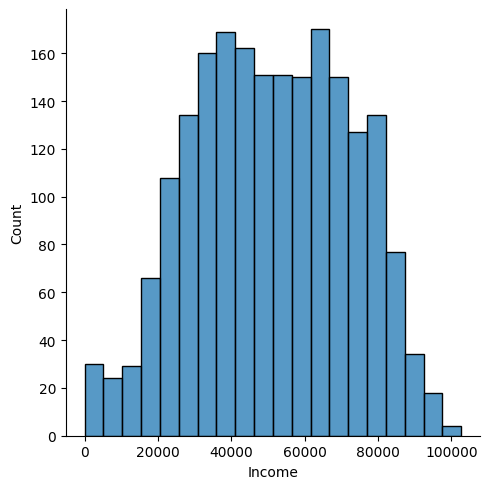

In [4694]:
sns.displot(df['Income'])
df['Income'].describe()

In [4695]:
# Dropping Outliers in Age using STD method
income = df['Age'].values
mean = np.mean(income)
std = np.std(income)

threshold_lower = mean - 2 * std
threshold_upper = mean + 2 * std

df = df[(df['Age'] >= threshold_lower) & (df['Age'] <= threshold_upper)]

In [4696]:
# sns.displot(df['Age'])
# df['Age'].describe()

### Feature Engineering

In [4697]:
# Total # of Children and Identify if Single Parent
# No effect if no other column is removed
df['TotalChildren'] = df['Kidhome']+df['Teenhome']
df['SingleParent'] = False

# Single
SingleParentMask = (df['Marital_Status'] == 'Single') & (df['TotalChildren']>0)
df.loc[SingleParentMask, 'SingleParent'] = True

# Widow
SingleParentMask = (df['Marital_Status'] == 'Widow') & (df['TotalChildren']>0)
df.loc[SingleParentMask, 'SingleParent'] = True

# Divorced
SingleParentMask = (df['Marital_Status'] == 'Divorced') & (df['TotalChildren']>0)
df.loc[SingleParentMask, 'SingleParent'] = True

# Incentivize DealsPurchases if SingleParent
df.loc[df['SingleParent'], 'NumDealsPurchases'] **=2
# df.loc[df['SingleParent'], 'NumCatalogPurchases'] **=2
# df.loc[df['SingleParent'], 'NumWebPurchases'] **=2
# df.loc[df['SingleParent'], 'NumStorePurchases'] *=2

In [4698]:
# Ratio of Mnt column to the Income; 

df['TotalAmount'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
sum = df['TotalAmount'].sum()
aveSum = sum/ len(df)
df['Ratio'] = df['Income']/df['TotalAmount']**2
# df['Ratio'] = df['TotalAmount']**2/df['Income']
df['Ratio'].replace([np.inf,-np.inf], np.nan, inplace=True)
df['Ratio'].fillna(0, inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\757315105.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ratio'].replace([np.inf,-np.inf], np.nan, inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\757315105.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [4699]:
# Total # of people in the household
df['HouseholdCount'] = 1
df['HouseholdCount'] += df['TotalChildren']
df.loc[df['Marital_Status'].isin(['Married','Together']),'HouseholdCount'] += 1

In [4700]:
# Kids to WebVisits
df['KidWebVisits'] = df['NumWebVisitsMonth']/df['TotalChildren']**2

df['KidWebVisits'].replace([np.inf,-np.inf], np.nan, inplace=True)
df['KidWebVisits'].fillna(0, inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\3234566429.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['KidWebVisits'].replace([np.inf,-np.inf], np.nan, inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\3234566429.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [4701]:
# Ratio of Total Purchases to Income

df['PurchasesToIncome'] = df[['NumDealsPurchases','NumCatalogPurchases','NumWebPurchases','NumStorePurchases']].sum(axis=1)
df['DealsToAmount'] = df['PurchasesToIncome']/df['TotalAmount']
df['PurchasesToIncome']= df['PurchasesToIncome']**2/df['Income']


df['PurchasesToIncome'].replace([np.inf,-np.inf], np.nan, inplace=True)
df['PurchasesToIncome'].fillna(0, inplace=True)
# df['Ave'] = df['TotalPurchases']**2/df['TotalAmount']
# df.fillna(0, inplace=True)
# df['Ave'] = df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\583707117.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PurchasesToIncome'].replace([np.inf,-np.inf], np.nan, inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\583707117.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [4702]:
df['Test'] = df['Income']/df['NumWebVisitsMonth']**2

df['Test'].replace([np.inf,-np.inf], np.nan, inplace=True)
df['Test'].fillna(0, inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\1152253509.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Test'].replace([np.inf,-np.inf], np.nan, inplace=True)
C:\Users\Predator\AppData\Local\Temp\ipykernel_1160\1152253509.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [4703]:
# df['Test2'] = df['Income']/df['Kidhome']**2

# df['Test2'].replace([np.inf,-np.inf], np.nan, inplace=True)
# df['Test2'].fillna(0, inplace=True)

In [4704]:
# df['Test3'] = df['TotalAmount']**2/df['NumWebVisitsMonth']

# df['Test3'].replace([np.inf,-np.inf], np.nan, inplace=True)
# df['Test3'].fillna(0, inplace=True)

In [4705]:
# df['Test4'] = df['TotalAmount']**2/df['Kidhome']

# df['Test4'].replace([np.inf,-np.inf], np.nan, inplace=True)
# df['Test4'].fillna(0, inplace=True)

In [4706]:
# # Compute the correlation matrix
# correlation_matrix = df.corr()

# # Plot the heatmap
# plt.figure(figsize=(18, 14))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

#### Zero to Negative effect

In [4707]:
# Ave Money for the Household Size
# df['HouseholdAveIncome'] = df['Income']/df['HouseholdCount']
# df.loc[df['SingleParent'], 'HouseholdAveIncome'] /=2

In [4708]:
# If with kids Not helpful; Redundant
# df['Parent']=False
# df.loc[((df['Marital_Status'].isin(['Married', 'Together', 'Widow', 'Single', 'Divorced'])) & df['TotalChildren']>0),'Parent']=True

In [4709]:
## If Married and Together with kids No effect; Redundant
# df['NotSingleParent']=False
# df.loc[((df['Marital_Status'].isin(['Married', 'Together'])) & df['TotalChildren']>0),'NotSingleParent']=True

In [4710]:
# WebTransactions Not helpful
# df['WebTransactions'] = df['NumWebPurchases']**2/df['NumWebVisitsMonth']
# df.replace([np.inf,-np.inf, np.nan],0, inplace=True)

In [4711]:
# No Effect
# bins = [0, 24, 177, 505, 1500]
# labels = [1,2,3,4]

# df['MntWinesNum'] = pd.cut(df['MntWines'],bins=bins, labels=labels, right=False)
# df['MntWinesNum'] = df['MntWinesNum'].astype(int)

In [4712]:
## RecencyRelevance
# df['RecencyRelevance'] = df['Recency']**2/(df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']
#                                            +df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines'])

## Initial Exploratory Data Analysis

In [4713]:
# colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

# #create pie chart
# plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
# plt.legend()
# plt.show()

In [4714]:
# colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

# #create pie chart
# plt.pie(df['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
# plt.legend()
# plt.show()

In [4715]:
# sns.barplot(x = 'Income', y = 'count', data=df[['Income']].value_counts().reset_index(name='count'))
# sns.countplot(x='Income',data=df_complaints)
# plt.xticks(rotation=45)
# plt.show()
# df

In [4716]:
# sns.barplot(x = 'Complain', y='count', hue = 'Response',data=df[['Complain', 'Response']].value_counts().reset_index())
    
# plt.show()

In [4717]:
# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
#     tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
#     tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

#     sns.barplot(x = col, y='count', 
#                    hue = 'Response',data=tmp, ax=ax)
    
# plt.show()

In [4718]:
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

# for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
#     sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
# plt.show()

## Baseline Modelling

In [4719]:
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first=True, prefix=column+suffix)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [4720]:
df = one_hot_encode(df, 'Education')
df = one_hot_encode(df, 'Marital_Status')

In [4721]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# from sklearn.

## Logistic Regression


In [4722]:
from sklearn.model_selection import train_test_split

X = df.drop(['Response', 'Complain'], axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4723]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4724]:
lg = LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lg,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_scaled, y_train)

C:\Users\Predator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Predator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='precision')

In [4725]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
lg = grid_search.best_estimator_
lg.fit(X_train_scaled, y_train)
lg_pred_train = lg.predict(X_train_scaled)
lg_pred_test = lg.predict(X_test_scaled)
lg_acc = accuracy_score(y_test, lg_pred_test)
lg_prec = precision_score(y_test, lg_pred_test)
lg_rec = recall_score(y_test, lg_pred_test)
lg_f1 = f1_score(y_test, lg_pred_test)
lg_auc = roc_auc_score(y_test, lg_pred_test)
# print("Logistic Regression Accuracy: %.4f" % lg_acc)
# print("Logistic Regression Precision: %.4f" % lg_prec)
# print("Logistic Regression Recall: %.4f" % lg_rec)
# print("Logistic Regression F1: %.4f" % lg_f1)
# print("Logistic Regression AUC: %.4f" % lg_auc)

lg_prec_train = precision_score(y_train, lg_pred_train)
lg_prec_test = precision_score(y_test, lg_pred_test)
# Check for overfitting
# print('Training set score: {:.4f}'.format(lg_prec_train))
# print('Test set score: {:.4f}'.format(lg_prec_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg, X_train_scaled, y_train, cv = 5, scoring='precision')
# print('Cross-validation scores:{}'.format(scores))
# print('Average cross-validation score: {:.4f}'.format(scores.mean())) # lower CV score = does not result in improved performance

GridSearch CV best score : 0.8968


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000)
GridSearch CV score on test set: 0.1552


C:\Users\Predator\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Predator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

## Naive Bayes

In [4726]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred_test)
nb_prec = precision_score(y_test, nb_pred_test)
nb_rec = recall_score(y_test, nb_pred_test)
nb_f1 = f1_score(y_test, nb_pred_test)
nb_auc = roc_auc_score(y_test, nb_pred_test)
# print("Naive Bayes Accuracy: %.4f" % nb_acc)
# print("Naive Bayes Precision: %.4f" % nb_prec)
# print("Naive Bayes Recall: %.4f" % nb_rec)
# print("Naive Bayes F1: %.4f" % nb_f1)
# print("Naive Bayes AUC: %.4f" % nb_auc)

nb_prec_train = precision_score(y_train, nb_pred_train)
nb_prec_test = precision_score(y_test, nb_pred_test)
# Check for overfitting
# print('Training set score: {:.4f}'.format(nb_prec_train))
# print('Test set score: {:.4f}'.format(nb_prec_test))

scores = cross_val_score(nb, X_train, y_train, cv = 5, scoring='precision')
# print('Cross-validation scores:{}'.format(scores))
# print('Average cross-validation score: {:.4f}'.format(scores.mean())) 

## Decision Trees

In [4727]:
dt = DecisionTreeClassifier()

# Define the parameter grid to search
parameters = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
grid_search = GridSearchCV(estimator = dt,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

# print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
# print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

dt = grid_search.best_estimator_
dt.fit(X_train,y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred_test)
dt_prec = precision_score(y_test, dt_pred_test)
dt_rec = recall_score(y_test, dt_pred_test)
dt_f1 = f1_score(y_test, dt_pred_test)
dt_auc = roc_auc_score(y_test, dt_pred_test)
# print("Decision Trees Accuracy: %.4f" % dt_acc)
# print("Decision Trees Precision: %.4f" % dt_prec)
# print("Decision Trees Recall: %.4f" % dt_rec)
# print("Decision Trees F1: %.4f" % dt_f1)
# print("Decision Trees AUC: %.4f" % dt_auc)

dt_prec_train = precision_score(y_train, dt_pred_train)
dt_prec_test = precision_score(y_test, dt_pred_test)
# Check for overfitting
# print('Training set score: {:.4f}'.format(dt_prec_train))
# print('Test set score: {:.4f}'.format(dt_prec_test))

## K Nearest Neighbor

In [4728]:
knn = KNeighborsClassifier()

def compute_optimal_n_neighbors(X, y, n_neighbors_range, cv=5, scoring='precision'):
    mean_scores = []
    for n_neighbors in n_neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(knn, X, y, cv=cv, scoring=scoring)
        mean_scores.append(np.mean(scores))
    optimal_n_neighbors = n_neighbors_range[np.argmax(mean_scores)]
    return optimal_n_neighbors, mean_scores
optimal_n_neighbors, mean_scores = compute_optimal_n_neighbors(X_train_scaled, y_train, n_neighbors_range=[3, 5, 7, 9, 11])
# print("Optimal number of neighbors:", optimal_n_neighbors)
# print("Mean cross-validation scores:", mean_scores)

# Define the parameter grid to search
parameters = {
    'n_neighbors': [optimal_n_neighbors],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric used for the tree
}
grid_search = GridSearchCV(estimator = knn,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_scaled, y_train)

# print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
# print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

knn = grid_search.best_estimator_
knn.fit(X_train_scaled,y_train)
knn_pred_train = knn.predict(X_train_scaled)
knn_pred_test = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred_test)
knn_prec = precision_score(y_test, knn_pred_test)
knn_rec = recall_score(y_test, knn_pred_test)
knn_f1 = f1_score(y_test, knn_pred_test)
knn_auc = roc_auc_score(y_test, knn_pred_test)
# print("k-Nearest Neighbors Accuracy: %.4f" % knn_acc)
# print("k-Nearest Neighbors Precision: %.4f" % knn_prec)
# print("k-Nearest Neighbors Recall: %.4f" % knn_rec)
# print("k-Nearest Neighbors F1: %.4f" % knn_f1)
# print("k-Nearest Neighbors AUC: %.4f" % knn_auc)

knn_prec_train = precision_score(y_train, knn_pred_train)
knn_prec_test = precision_score(y_test, knn_pred_test)
# Check for overfitting
# print('Training set score: {:.4f}'.format(knn_prec_train))
# print('Test set score: {:.4f}'.format(knn_prec_test))

## SVM

In [4729]:
from sklearn.metrics import make_scorer

svm=SVC() 
svm.fit(X_train,y_train)

scorer = make_scorer(precision_score, average='binary', zero_division=0)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}

grid_search = GridSearchCV(estimator=svm, scoring=scorer, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

svm = grid_search.best_estimator_
svm.fit(X_train_scaled,y_train)
svm_pred_train = svm.predict(X_train_scaled)
svm_pred_test = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred_test)
svm_prec = precision_score(y_test, svm_pred_test)
svm_rec = recall_score(y_test, svm_pred_test)
svm_f1 = f1_score(y_test, svm_pred_test)
svm_auc = roc_auc_score(y_test, svm_pred_test)
# print("Support Vector Machines Accuracy: %.4f" % svm_acc)
# print("Support Vector Machines Precision: %.4f" % svm_prec)
# print("Support Vector Machines Recall: %.4f" % svm_rec)
# print("Support Vector Machines F1: %.4f" % svm_f1)
# print("Support Vector Machines AUC: %.4f" % svm_auc)

svm_prec_train = precision_score(y_train, svm_pred_train)
svm_prec_test = precision_score(y_test, svm_pred_test)
# Check for overfitting
# print('Training set score: {:.4f}'.format(svm_prec_train))
# print('Test set score: {:.4f}'.format(svm_prec_test))

# print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
# print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_scaled, y_test)))

### Result Matrix and Graphs

In [4730]:
from prettytable import PrettyTable
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Precision Training Score', 'Precision Test Score']

logistic_reg = [lg_acc, lg_prec, lg_rec, lg_f1, lg_auc, lg_prec_train, lg_prec_test]
logistic_reg = [f'{value:.4f}' if isinstance(value, float) else value for value in logistic_reg]

naive_bayes = [nb_acc, nb_prec, nb_rec, nb_f1, nb_auc, nb_prec_train, nb_prec_test]
naive_bayes = [f'{value:.4f}' if isinstance(value, float) else value for value in naive_bayes]

decision_tree = [dt_acc, dt_prec, dt_rec, dt_f1, dt_auc, dt_prec_train, dt_prec_test]
decision_tree = [f'{value:.4f}' if isinstance(value, float) else value for value in decision_tree]

k_nearest = [knn_acc, knn_prec, knn_rec, knn_f1, knn_auc, knn_prec_train, knn_prec_test] 
k_nearest = [f'{value:.4f}' if isinstance(value, float) else value for value in k_nearest]

support_vector = [svm_acc, svm_prec, svm_rec, svm_f1, svm_auc, svm_prec_train, svm_prec_test]
support_vector = [f'{value:.4f}' if isinstance(value, float) else value for value in support_vector]

# Create a list of tuples containing variable names and their values
variables = [
    ('Logistic Regression', logistic_reg),
    ('Naive Bayes', naive_bayes),
    ('Decision Tree', decision_tree),
    ('k-Nearest Neighbors', k_nearest),
    ('Support Vector Machines', support_vector)
]
table = PrettyTable()
# Display variables in a tabular format
table.add_column('Algorithm', labels)
table.add_column('Logistic Regression', logistic_reg)
table.add_column('Naive Bayes', naive_bayes)
table.add_column('Decision Tree', decision_tree)
table.add_column('k-Nearest Neighbors', k_nearest)
table.add_column('Support Vector Machines', support_vector)
table.align = 'l'
print(table)

+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Algorithm                | Logistic Regression | Naive Bayes | Decision Tree | k-Nearest Neighbors | Support Vector Machines |
+--------------------------+---------------------+-------------+---------------+---------------------+-------------------------+
| Accuracy                 | 0.8614              | 0.6881      | 0.8144        | 0.7921              | 0.8886                  |
| Precision                | 0.5532              | 0.2628      | 0.3750        | 0.3506              | 0.7353                  |
| Recall                   | 0.4262              | 0.5902      | 0.3443        | 0.4426              | 0.4098                  |
| F1                       | 0.4815              | 0.3636      | 0.3590        | 0.3913              | 0.5263                  |
| AUC                      | 0.6825              | 0.6479      | 0.6211        | 0.6484          

In [4731]:
# conf_mat = confusion_matrix(y_test, preds)
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion Matrix')
# plt.show()

In [4732]:
## Feature Importance
# feature_names = X.columns
# plt.figure(figsize=(10, 6))
# plt.barh(np.arange(len(feature_names)), clf.coef_[0], color='skyblue')
# plt.yticks(np.arange(len(feature_names)), feature_names)
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')
# plt.title('Logistic Regression Coefficients')
# plt.grid(True)
# plt.show()